In [1]:
%%time

import pandas as pd
import numpy as np

df = pd.read_csv('./application_train.csv')

CPU times: user 4.23 s, sys: 541 ms, total: 4.77 s
Wall time: 4.94 s


In [2]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
df.shape

(307511, 122)

In [4]:
%%time
df = df.sample(50000, random_state=0).reset_index(drop=True)

CPU times: user 53.2 ms, sys: 22.3 ms, total: 75.6 ms
Wall time: 75.5 ms


In [5]:
df.shape

(50000, 122)

In [6]:
df.drop(columns=['SK_ID_CURR'], inplace=True)

In [7]:
# df = df.drop('SK_ID_CURR', axis='columns') 

In [8]:
df.columns

Index(['TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=121)

In [9]:
df.dtypes

TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
FLAG_OWN_REALTY                object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 121, dtype: object

In [10]:
df.dtypes[df.dtypes == object].keys().tolist()

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'WALLSMATERIAL_MODE',
 'EMERGENCYSTATE_MODE']

In [11]:
for c in df.dtypes[df.dtypes == object].keys().tolist():
    print(" --- %s --- " % c)
    print(df[c].value_counts())

 --- NAME_CONTRACT_TYPE --- 
Cash loans         45188
Revolving loans     4812
Name: NAME_CONTRACT_TYPE, dtype: int64
 --- CODE_GENDER --- 
F      33029
M      16970
XNA        1
Name: CODE_GENDER, dtype: int64
 --- FLAG_OWN_CAR --- 
N    32981
Y    17019
Name: FLAG_OWN_CAR, dtype: int64
 --- FLAG_OWN_REALTY --- 
Y    34758
N    15242
Name: FLAG_OWN_REALTY, dtype: int64
 --- NAME_TYPE_SUITE --- 
Unaccompanied      40492
Family              6490
Spouse, partner     1838
Children             523
Other_B              260
Other_A              154
Group of people       41
Name: NAME_TYPE_SUITE, dtype: int64
 --- NAME_INCOME_TYPE --- 
Working                 25905
Commercial associate    11653
Pensioner                8910
State servant            3520
Student                     6
Unemployed                  4
Maternity leave             2
Name: NAME_INCOME_TYPE, dtype: int64
 --- NAME_EDUCATION_TYPE --- 
Secondary / secondary special    35397
Higher education                 12231
Incomple

In [12]:
df.replace('XNA', np.nan, inplace=True)

In [13]:
df['CODE_GENDER'].value_counts()

F    33029
M    16970
Name: CODE_GENDER, dtype: int64

In [14]:
numeric_features = df.dtypes[(df.dtypes == np.float64) | (df.dtypes == np.int64)].keys().tolist()

cat_features = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY','EMERGENCYSTATE_MODE']

In [15]:
df = df[numeric_features + cat_features]
df.columns.tolist()

['TARGET',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEA

In [16]:
df_test = df.sample(n=10000, random_state=0)
df_train = df.drop(index=df_test.index)

df_test = df_test.reset_index(drop=True)
df_train = df_train.reset_index(drop=True)

print(df_test.shape)
print(df_train.shape)

(10000, 110)
(40000, 110)


In [17]:
from sklearn.impute import SimpleImputer

In [18]:
imp_cat = SimpleImputer(strategy='most_frequent')

In [19]:
%%time 

df_train[cat_features] = imp_cat.fit_transform(df_train[cat_features])
df_test[cat_features] = imp_cat.fit_transform(df_test[cat_features])

CPU times: user 47.6 ms, sys: 1.5 ms, total: 49.1 ms
Wall time: 48 ms


In [20]:
print(df_train[cat_features].isna().sum())
print()
print(df_test[cat_features].isna().sum())

NAME_CONTRACT_TYPE     0
CODE_GENDER            0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
EMERGENCYSTATE_MODE    0
dtype: int64

NAME_CONTRACT_TYPE     0
CODE_GENDER            0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
EMERGENCYSTATE_MODE    0
dtype: int64


In [21]:
df_train[cat_features].head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,EMERGENCYSTATE_MODE
0,Cash loans,F,N,N,No
1,Revolving loans,M,Y,Y,No
2,Cash loans,M,Y,Y,No
3,Cash loans,M,Y,Y,No
4,Cash loans,F,N,Y,No


In [22]:
from sklearn.preprocessing import OrdinalEncoder

In [23]:
enc = OrdinalEncoder()

In [24]:
%%time 

df_train[cat_features] = enc.fit_transform(df_train[cat_features])
df_test[cat_features] = enc.fit_transform(df_test[cat_features])

CPU times: user 71.9 ms, sys: 1.24 ms, total: 73.1 ms
Wall time: 71.9 ms


In [25]:
df_train[cat_features].head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,EMERGENCYSTATE_MODE
0,0.0,0.0,0.0,0.0,0.0
1,1.0,1.0,1.0,1.0,0.0
2,0.0,1.0,1.0,1.0,0.0
3,0.0,1.0,1.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0


In [26]:
df[numeric_features].head()

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,1,0,117000.0,417024.0,20191.5,360000.0,0.020246,-21774,-2125,-4611.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
1,0,0,450000.0,640080.0,31261.5,450000.0,0.046220,-18499,-2055,-3052.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
2,0,0,450000.0,900000.0,45000.0,900000.0,0.010643,-18084,-4159,-8525.0,...,0,0,0,0,0.0,0.0,0.0,0.0,2.0,0.0
3,0,1,360000.0,1125000.0,33025.5,1125000.0,0.018634,-12319,-2532,-12304.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
4,0,0,675000.0,835380.0,42840.0,675000.0,0.020713,-10151,-2516,-2789.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0


In [27]:
cat_bin_features = []
for i in numeric_features:
    if len(df[i].value_counts().keys().tolist()) == 2:
        cat_bin_features.append(i)

In [28]:
cat_bin_features

['TARGET',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21']

In [29]:
# df['TARGET'].value_counts().keys().tolist()

In [30]:
imp_bin_cat = SimpleImputer(strategy='most_frequent')

In [31]:
%%time

df_train[cat_bin_features] = imp_bin_cat.fit_transform(df_train[cat_bin_features])
df_test[cat_bin_features] = imp_bin_cat.fit_transform(df_test[cat_bin_features])

CPU times: user 77.9 ms, sys: 3.39 ms, total: 81.3 ms
Wall time: 80 ms


/Users/evgenijgrinev/opt/anaconda3/lib/python3.9/site-packages/sklearn/impute/_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(array)
/Users/evgenijgrinev/opt/anaconda3/lib/python3.9/site-packages/sklearn/impute/_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True

In [32]:
df_train[cat_bin_features].isna().sum()

TARGET                         0
FLAG_EMP_PHONE                 0
FLAG_WORK_PHONE                0
FLAG_CONT_MOBILE               0
FLAG_PHONE                     0
FLAG_EMAIL                     0
REG_REGION_NOT_LIVE_REGION     0
REG_REGION_NOT_WORK_REGION     0
LIVE_REGION_NOT_WORK_REGION    0
REG_CITY_NOT_LIVE_CITY         0
REG_CITY_NOT_WORK_CITY         0
LIVE_CITY_NOT_WORK_CITY        0
FLAG_DOCUMENT_2                0
FLAG_DOCUMENT_3                0
FLAG_DOCUMENT_4                0
FLAG_DOCUMENT_5                0
FLAG_DOCUMENT_6                0
FLAG_DOCUMENT_7                0
FLAG_DOCUMENT_8                0
FLAG_DOCUMENT_9                0
FLAG_DOCUMENT_10               0
FLAG_DOCUMENT_11               0
FLAG_DOCUMENT_13               0
FLAG_DOCUMENT_14               0
FLAG_DOCUMENT_15               0
FLAG_DOCUMENT_16               0
FLAG_DOCUMENT_17               0
FLAG_DOCUMENT_18               0
FLAG_DOCUMENT_19               0
FLAG_DOCUMENT_20               0
FLAG_DOCUM

In [33]:
imp_numeric = SimpleImputer(missing_values=np.nan, strategy='mean')

In [34]:
%%time 

df_train[numeric_features] = imp_numeric.fit_transform(df_train[numeric_features])
df_test[numeric_features] = imp_numeric.fit_transform(df_test[numeric_features])

CPU times: user 262 ms, sys: 27.3 ms, total: 289 ms
Wall time: 296 ms


In [35]:
print(len(df_train.columns.tolist()))
print(df_train.shape)

110
(40000, 110)


In [36]:
df_train.head()

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,EMERGENCYSTATE_MODE
0,1.0,0.0,117000.0,417024.0,20191.5,360000.0,0.020246,-21774.0,-2125.0,-4611.0,...,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,450000.0,900000.0,45000.0,900000.0,0.010643,-18084.0,-4159.0,-8525.0,...,0.0,0.0,0.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0
2,0.0,0.0,675000.0,835380.0,42840.0,675000.0,0.020713,-10151.0,-2516.0,-2789.0,...,0.0,0.0,0.0,0.0,2.0,0.0,1.0,1.0,1.0,0.0
3,0.0,2.0,112500.0,455040.0,12510.0,360000.0,0.018634,-20176.0,-878.0,-4818.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0
4,0.0,0.0,99000.0,328405.5,16897.5,283500.0,0.010966,-19979.0,-5518.0,-9890.0,...,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,1.0,0.0


In [37]:
X_train = df_train[df_train.columns[1:][:]]
X_test = df_test[df_test.columns[1:][:]]

y_train = df_train[df_train.columns[:1][:]]
y_test = df_test[df_test.columns[:1][:]]

# X_train.head()
# y_train.head()

In [38]:
from sklearn.preprocessing import StandardScaler

In [39]:
standard = StandardScaler()

standard.fit(X_train)

X_train_standart = standard.transform(X_train)
X_test_standart = standard.transform(X_test)

In [40]:
from sklearn.metrics import roc_auc_score 

In [41]:
y_train.head()

,TARGET
0,1.0
1,0.0
2,0.0
3,0.0
4,0.0


In [42]:
roc_auc_score(y_train, [0]*len(y_train))

0.5

In [43]:
# [0]*len(y_train)

In [44]:
roc_auc_score(y_train, [1]*len(y_train))

0.5

In [45]:
from sklearn.linear_model import LogisticRegression

In [46]:
logreg = LogisticRegression(max_iter = 1000)

In [47]:
logreg.fit(X_train_standart, y_train)

/Users/evgenijgrinev/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(max_iter=1000)

In [48]:
roc_auc_score(y_test, logreg.predict_proba(X_test_standart)[:,1])

0.7319295264537878

In [49]:
roc_auc = roc_auc_score(y_test, logreg.predict_proba(X_test_standart)[:,1])

In [50]:
proba = logreg.predict_proba(X_test_standart)

In [51]:
logreg.predict_proba(X_test_standart)

array([[0.91985942, 0.08014058],
       [0.93368805, 0.06631195],
       [0.97294105, 0.02705895],
       ...,
       [0.9439435 , 0.0560565 ],
       [0.96225885, 0.03774115],
       [0.94563721, 0.05436279]])

In [52]:
logreg.predict_proba(X_test_standart)[:,1]

array([0.08014058, 0.06631195, 0.02705895, ..., 0.0560565 , 0.03774115,
       0.05436279])

In [53]:
from sklearn.metrics import roc_curve

In [54]:
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test_standart)[:,1])

In [55]:
print(fpr)
print()
print(tpr)
print()
print(thresholds)

[0.00000000e+00 0.00000000e+00 2.18269126e-04 ... 9.93015388e-01
 9.93015388e-01 1.00000000e+00]

[0.         0.00119474 0.00119474 ... 0.99880526 1.         1.        ]

[1.59381725e+00 5.93817252e-01 5.49893355e-01 ... 6.08632003e-03
 6.02865885e-03 2.13996823e-05]


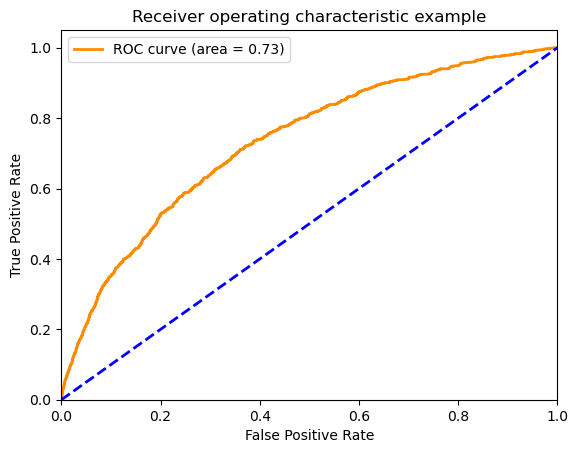

In [56]:
from matplotlib import pyplot as plt

plt.figure()
# lw = linewieght 
lw = 2

plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0,1],[0,1], color='blue', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.title('Receiver operating characteristic example') 
plt.legend(loc="upper left")
plt.show()

In [57]:
from sklearn.metrics import f1_score, precision_score, recall_score

In [58]:
# prediction = 1
print(recall_score(y_test, [1]*len(y_test)))
print(precision_score(y_test, [1]*len(y_test)))
print(f1_score(y_test, [1]*len(y_test)))

1.0
0.0837
0.15447079450032297


In [59]:
# prediction = 0
print(recall_score(y_test, [0]*len(y_test)))
print(precision_score(y_test, [0]*len(y_test)))
print(f1_score(y_test, [0]*len(y_test)))

0.0
0.0
0.0


/Users/evgenijgrinev/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [60]:
# proba = logreg.predict_proba(X_test_standart)
predictions = proba[:, 1].copy()
# predictions
predictions[np.where(predictions > 0.1)] = 1
predictions[np.where(predictions <= 0.1)] = 0

In [64]:
# proba = logreg.predict_proba(X_test_standart)
predictions2 = proba[:, 1].copy()
# predictions
predictions2[np.where(predictions2 > 0.5)] = 1
predictions2[np.where(predictions2 <= 0.5)] = 0

In [66]:
# при предсказании с порогом 0.5
print(recall_score(y_test, predictions))
print(precision_score(y_test, predictions))
print(f1_score(y_test, predictions))


0.5436081242532855
0.18708881578947367
0.278372591006424


In [67]:
# при предсказании с порогом 0.5
print(recall_score(y_test, predictions2))
print(precision_score(y_test, predictions2))
print(f1_score(y_test, predictions2))


0.010752688172043012
0.42857142857142855
0.02097902097902098
